# INSTRUCTIONS

1. Download the excel template.
2. Fill the gray cells of the excel.
3. Run in this notebook the cell in the subtitle "2.a" to upload the data.
4. Run in this notebook the cell in the subtitle "2.b" to process the data, draw the diagram and save it in your computer.

----

- Check the tutorial videos on:
 - __[English](https://youtu.be/2ektqyB7WLE)__
  - __[Español](https://youtu.be/ha9_bdEis3k)__

- Like the __[Github repository](https://github.com/JoseChirif/PERT-diagram-with-colab)__.

# 1. CREATE EXCEL TEMPLATE

In [ ]:
from openpyxl import Workbook
from openpyxl.styles import Alignment, Font, PatternFill
from openpyxl.utils import get_column_letter
from google.colab import files

# Create a new excel workbook
wb = Workbook()

# create the sheet "Dictionary"
ws_dict = wb.create_sheet(title="Dictionary")

# Add heading in row 1
ws_dict['A1'] = 'Item'
ws_dict['B1'] = 'Item Letter'

# Filling values on column A and B
for i in range(2, 1501):
    ws_dict[f"A{i}"] = i  # Numbers in column A
    ws_dict[f"B{i}"] = get_column_letter(i - 1)  # Letters in column B

# Hide the sheet "Dictionary"
ws_dict.sheet_state = 'hidden'

# Create and configure the “PERT Diagram” sheetHaz clic para usar esta alternativa
ws_pert = wb.active
ws_pert.title = "PERT Diagram"

# Headings
headers = ["Item\n(A, B, C…)", "Activity Name", "Preceding Items\n(A, B, C…)", "Duration"]
ws_pert.append(headers)

# Styles for headings
header_fill = PatternFill(start_color="A6C9EC", end_color="A6C9EC", fill_type="solid")
header_font = Font(bold=True)
header_alignment = Alignment(horizontal="center", vertical="center", wrap_text=True)

for col, header in enumerate(headers, start=1):
    cell = ws_pert.cell(row=1, column=col, value=header)
    cell.fill = header_fill
    cell.font = header_font
    cell.alignment = header_alignment

# Adjust width of columns and height of row 1
ws_pert.column_dimensions['A'].width = 13
ws_pert.column_dimensions['B'].width = 13
ws_pert.column_dimensions['C'].width = 17.45
ws_pert.column_dimensions['D'].width = 13
ws_pert.column_dimensions['F'].width = 19
ws_pert.column_dimensions['I'].width = 19
ws_pert.row_dimensions[1].height = 29

# Add formulas and color in column A from row 2
formula_fill = PatternFill(start_color="DAE9F8", end_color="DAE9F8", fill_type="solid")
for i in range(2, 1501):
    ws_pert[f"A{i}"] = f'=IF(B{i}<>"",VLOOKUP(ROW(),Dictionary!$A$1:$B$1500,2,FALSE),"")'
    ws_pert[f"A{i}"].fill = formula_fill

# Background color for columns B, C, and D
content_fill = PatternFill(start_color="F2F2F2", end_color="F2F2F2", fill_type="solid")
for col in range(2, 5):
    for row in range(2, 1001):
        ws_pert.cell(row=row, column=col).fill = content_fill

# Text and styles in cell F1
ws_pert["F1"].value = "Time unit (optional):"
ws_pert["F1"].fill = header_fill
ws_pert["F1"].font = header_font
ws_pert["F1"].alignment = header_alignment

# Style and color for cell G1
ws_pert["G1"].fill = content_fill

# Text and styles in cell I1
ws_pert["I1"].value = "Diagram title (optional):"
ws_pert["I1"].fill = header_fill
ws_pert["I1"].font = header_font
ws_pert["I1"].alignment = header_alignment

# Style and color for cell J1
ws_pert["J1"].fill = content_fill

# Notes (keeping cells separate)
ws_pert["F6"].value = "Notes:"
ws_pert["F6"].font = Font(bold=True)


ws_pert["F7"].value = "It should start from a single item and end with a single item."
ws_pert["F8"].value = "Preceding items must be separated by commas."
ws_pert["F9"].value = (
    "Time unit will be added to the footer of the image. If left empty, nothing will be added."
)
ws_pert["F10"].value = (
    "Do not add or modify columns in the template as it may affect the script's functionality."
)
ws_pert["F11"].value = "Fill the cells with the gray fill color."
ws_pert["F11"].fill = content_fill  # Fondo gris solo en F11
ws_pert["F13"].value = "By Jose Chirif (github.com/JoseChirif)."


# Save the excel file
file_name = "PERT_Diagram.xlsx"
wb.save(file_name)

# Automatically download the file
files.download(file_name)

print(f"{file_name} has been created and downloaded.")


# 2. CREATE PERT DIAGRAM

## 2.a. Upload data

In [ ]:
import pandas as pd
import numpy as np
import os
from google.colab import files

# Upload the file
uploaded = files.upload()

# Process the uploaded files
for filename in uploaded.keys():
    # If a file with the same name exists, this will be replaced by the new one.
    if os.path.exists(filename):
        os.remove(filename)
    with open(filename, 'wb') as f:
        f.write(uploaded[filename])

    # Read the Excel file to check how many columns there are
    df_temp = pd.read_excel(filename, header=None)

    # Get the number of columns in the DataFrame
    num_columns = df_temp.shape[1]

    # Print the number of columns (optional)
    print(f"The number of columns in {filename} is: {num_columns}")

# Read the file, selecting only the first 4 columns
df_main = pd.read_excel(filename, usecols=[0, 1, 2, 3])

# Change DataFrame headers
df_main.columns = ['Item', 'Activity name', 'Preceding Items', 'Duration']

# Remove empty rows from df_main
df_main = df_main.dropna(how='all')

# Convert the elements of 'Preceding Items' column into lists
df_main['Preceding Items'] = df_main['Preceding Items'].str.split(',')

## VARIABLES
# Read values from the first row, 0th index (G1) and 9th index (J1)
first_row = pd.read_excel(filename, header=None).iloc[0]

# Safe check: Only try to access columns 6 and 9 if they exist
time_units = first_row[6] if num_columns > 6 and pd.notna(first_row[6]) else ""

# Safe check for chart_title
chart_title = first_row[9] if num_columns >= 10 and pd.notna(first_row[9]) else "PERT Diagram"

# Format time_units
if time_units:
    time_units = f"- The time unit is {time_units}"

# Create the notes list
notes = [
    "Notes:",
    "- Using clearance may affect clearance for future activities.",
    "- Every diagram should start and end with a single node.",
    time_units
]

# Print the DataFrame and variables
print("DataFrame:")
print(f'Number of rows = {len(df_main)}')
print("Time units:", time_units)
print("Chart title:", chart_title)

df_main.head(len(df_main))  # Display the first few rows of the DataFrame


## 2.b Process data and draw diagram

In [ ]:
import sys
import numpy as np


## CREATE DF_ACTIVITIES
df_activities = df_main[['Item', 'Activity name']]
df_activities.columns.values[0] = 'Activity'

## CREATE DF_MASTER
# Normalize 'Preceding Items' to avoid errors
df_main["Preceding Items"] = df_main["Preceding Items"].apply(
    lambda x: [str(item).strip() for item in x] if isinstance(x, list) else []
)

# Dictionaries to track nodes and times
node_mapping = {}
time_mapping = {}
result = []

# Initial variable for the final node
current_final_node = 0

# Iterate over the DataFrame
for index, row in df_main.iterrows():
    activity = row["Item"]
    predecessors = row["Preceding Items"]
    duration = row["Duration"]

    # Reset node_mapping for the current activity
    temp_node_mapping = node_mapping.copy()

    # Check if the activity is an intermediate node
    intermediate_nodes = any(activity in pred for pred in df_main["Preceding Items"])

    if predecessors:  # If it has predecessors
        # Get times of predecessors if they are in the mapping
        predecessors_time = {pred: time_mapping[pred] for pred in predecessors if pred in time_mapping}

        if predecessors_time:  # If there are predecessors with recorded time
            max_pred = max(predecessors_time, key=predecessors_time.get)  # Predecessor with the longest time
            start_node = temp_node_mapping[max_pred]  # Start node will be the End node of the predecessor with the longest time
            max_time = predecessors_time[max_pred]

            # Add fictitious relations for other predecessors
            for pred in predecessors:
                if pred != max_pred:
                    result.append({
                        "Start node": temp_node_mapping[pred],
                        "End node": start_node,  # Points to the End node of the predecessor with the longest time
                        "Activity": "fictitious relation",
                        "Optimistic time": max_time,
                        "Node type": "Intermediate node",
                    })
        else:
            start_node = 0
            max_time = 0
    else:  # If it has no predecessors
        start_node = 0
        max_time = 0

    # Calculate accumulated time
    accumulated_time = max_time + duration

    # Increment final node
    current_final_node += 1
    final_node = current_final_node

    # Determine if it is an Intermediate node or a Final node
    node_type = "Intermediate node" if intermediate_nodes else "End node"

    # Register the activity
    result.append({
        "Start node": start_node,
        "End node": final_node,
        "Activity": activity,
        "Optimistic time": accumulated_time,
        "Node type": node_type,
    })

    # Update node and time mappings
    node_mapping[activity] = final_node
    time_mapping[activity] = accumulated_time

# Convert results into a DataFrame
df_master = pd.DataFrame(result)




########################################
########################################
########################################
## CREATE FICTITIOUS RELATIONS AT THE FINAL OF THE DF_MASTER
# Check if there is more than one End node
final_nodes = df_master[df_master["Node type"] == "End node"]
if len(final_nodes) > 1:
    # Determine the node with the highest Optimistic time
    max_final_node_opt = final_nodes.loc[final_nodes["Optimistic time"].idxmax()]
    max_final_node = max_final_node_opt["End node"]

    # Create more final nodes at the end as intermediates to the final node and create fictitious activities relations
    rows_to_modify = []  # List for rows to be modified
    for idx, row in final_nodes.iterrows():
        if row["End node"] != max_final_node:
            # Add the row to the list
            rows_to_modify.append(idx)

            # Create fictitious relation
            result.append({
                "Start node": row["End node"],
                "End node": max_final_node,
                "Activity": "fictitious relation",
                "Optimistic time": max_final_node_opt["Optimistic time"],
                "Node type": "Intermediate node",
            })

    # Modify node types in the DataFrame
    for idx in rows_to_modify:
        df_master.iloc[idx, df_master.columns.get_loc("Node type")] = "Intermediate node to force final"

    # Reconstruir el DataFrame
    df_master = pd.DataFrame(result)
    warning_message = "The graph must end in a single node. Fictional relations has been created to respect that."
else:
    warning_message = ""


# List to identify excess end nodes
excess_final_nodes = []

# Check all end nodes
if len(final_nodes) > 1:
    max_final_node_opt = final_nodes.loc[final_nodes["Optimistic time"].idxmax()]
    max_final_node = max_final_node_opt["End node"]

    # Traversing end nodes
    max_final_node_count = 0
    for _, row in final_nodes.iterrows():
        if row["End node"] != max_final_node or (row["End node"] == max_final_node and max_final_node_count > 0):
            excess_final_nodes.append(row["Activity"])  # Find the activity of the excess final node
        if row["End node"] == max_final_node:
            max_final_node_count += 1

# Print excess end nodes
print("Excess end nodes:", excess_final_nodes)
print(warning_message)

# Change column “Node type” to “Intermediate node to force final” for activities in excess_final_nodes
for activity in excess_final_nodes:
    df_master.loc[df_master["Activity"] == activity, "Node type"] = "Intermediate node to force only one final"


# Add the 'duration' from df_main (key 'Item') to df_master (key 'Activity').
# If an 'Activity' in d2 does not have a match in d1, set the corresponding 'duration' to 0.
df_master['Duration'] = df_master['Activity'].map(df_main.set_index('Item')['Duration']).fillna(0)







########################################
########################################
########################################
## CREATE NODES DF
# Get neccesary columns
df_nodes = df_master[["End node", "Activity", "Duration", "Optimistic time", "Node type"]]

# Delete fictitious relation (duplicated nodes)
df_nodes = df_nodes[df_nodes["Activity"] != "fictitious relation"]

# Rename node column
df_nodes.rename(columns={'End node': 'Node'}, inplace=True)


## Order by Node type
# Desired order for the 'Node type' column
order = ["Intermediate node", "Intermediate node to force only one final", "End node"]

# Ensure 'Node type' is a categorical type with the specified order
df_nodes["Node type"] = pd.Categorical(df_nodes["Node type"], categories=order, ordered=True)

# Sort the DataFrame based on the 'Node type' column
df_nodes = df_nodes.sort_values(by=["Node type", "Activity"]).reset_index(drop=True)


## Get Preceding Items
# Merge df_nodes with df_main on the appropriate columns
df_nodes = df_nodes.merge(df_main[['Item', 'Preceding Items']], left_on='Activity', right_on='Item', how='left')

# Drop the 'Item' column from df_nodes as it is no longer needed
df_nodes.drop(columns=['Item'], inplace=True)



## CALCULATION PESSIMISTIC TIME
# Initialize the "Pessimistic time" column with None
df_nodes["Pessimistic time"] = None

# Assign "Pessimistic time" for special nodes (Intermediate node to force only one final, End node)
end_node_pessimistic_time = df_nodes.loc[
    df_nodes["Node type"] == "End node", "Optimistic time"
].iloc[0]  # Assuming there is only one end node
df_nodes.loc[
    df_nodes["Node type"].isin(["Intermediate node to force only one final", "End node"]),
    "Pessimistic time"
] = end_node_pessimistic_time

# Iterate from the last row to the first
for idx in range(len(df_nodes) - 1, -1, -1):
    row = df_nodes.iloc[idx]

    # Calculate "value_temp" for the current row
    if pd.isna(row["Pessimistic time"]):
        value_temp = row["Optimistic time"] - row["Duration"]
        df_nodes.at[idx, "Pessimistic time"] = value_temp
    else:
        value_temp = df_nodes.at[idx, "Pessimistic time"] - row["Duration"]

    # Update the preceding items' "Pessimistic time" with the minimum value
    for activity in row["Preceding Items"]:
        # Find the index corresponding to the activity in "Activity"
        preceding_idx = df_nodes.index[df_nodes["Activity"] == activity].tolist()
        if preceding_idx:
            for p_idx in preceding_idx:
                # Do not modify "Pessimistic time" of special nodes
                if df_nodes.at[p_idx, "Node type"] in [
                    "Intermediate node to force only one final", "End node"
                ]:
                    continue

                # Assign the minimum value between the existing and the new value_temp
                if pd.isna(df_nodes.at[p_idx, "Pessimistic time"]):
                    df_nodes.at[p_idx, "Pessimistic time"] = value_temp
                else:
                    df_nodes.at[p_idx, "Pessimistic time"] = min(
                        df_nodes.at[p_idx, "Pessimistic time"], value_temp
                    )

## CALCULATING CLEARANCE
df_nodes["Clearance"] = df_nodes["Pessimistic time"] - df_nodes["Optimistic time"]


##IS CRITICAL PATH?
df_nodes["Critical path"] = df_nodes["Clearance"].apply(lambda x: "Y" if x == 0 else "N")

## CHECK IF Duration == Optimistic time == Pessimistic time in the 1st row
if df_nodes.iloc[0]["Pessimistic time"] != df_nodes.iloc[0]["Optimistic time"] or df_nodes.iloc[0]["Pessimistic time"] != df_nodes.iloc[0]["Duration"]:
    print("Error in calculation")
    sys.exit()  # This will stop the execution of the program
else:
    pass # Continue with your logic here if the condition is met

## CREATING NODE 0
# Create the new row to be inserted
new_row = pd.DataFrame({
    "Node": [0],
    "Activity": [0],
    "Duration": [None],
    "Optimistic time": [0],
    "Node type": [None],
    "Preceding Items": [[]],
    "Pessimistic time": [0],
    "Clearance": [0],
    "Critical path": ["Y"]
})

# Add the new row at the beginning of the DataFrame
df_nodes = pd.concat([new_row, df_nodes], ignore_index=True)

# Set "Preceding Items" of the second row to 0
df_nodes.at[1, "Preceding Items"] = [0]



## SETTING POSITION PARAMETERS' FOR THE NODES
# Initialize Pos X and Pos Y with zeros
df_nodes["Pos X"] = 0
df_nodes["Pos Y"] = 0

# Helper function to get all predecessors recursively
def get_predecessors(activity, predecessors_map):
    if activity not in predecessors_map or not predecessors_map[activity]:
        return set()
    direct_predecessors = predecessors_map[activity]
    all_predecessors = set(direct_predecessors)
    for pred in direct_predecessors:
        all_predecessors.update(get_predecessors(pred, predecessors_map))
    return all_predecessors

# Create a map for quick lookup of predecessors
predecessors_map = {row["Activity"]: row["Preceding Items"] for _, row in df_nodes.iterrows()}

# Iterate through the DataFrame starting from the second row
for idx, row in df_nodes.iterrows():
    if idx == 0:
        continue  # Skip the first row (Pos X and Pos Y are already initialized)

    # Calculate Pos X
    predecessors = get_predecessors(row["Activity"], predecessors_map)
    max_pos_x = max((df_nodes.loc[df_nodes["Activity"] == pred, "Pos X"].max() for pred in predecessors), default=0)
    df_nodes.at[idx, "Pos X"] = max_pos_x + 1

    # Calculate Pos Y
    direct_predecessors = row["Preceding Items"]
    if direct_predecessors:
        # Find the direct predecessor with the highest Optimistic Time
        predecessor_idx = max(
            (df_nodes.index[df_nodes["Activity"] == pred][0] for pred in direct_predecessors),
            key=lambda i: df_nodes.at[i, "Optimistic time"],
        )
        pos_y = df_nodes.at[predecessor_idx, "Pos Y"]
    else:
        pos_y = 0  # Default to 0 if no direct predecessors

    pos_x = df_nodes.at[idx, "Pos X"]
    # Ensure uniqueness of (Pos X, Pos Y)
    while any((df_nodes["Pos X"] == pos_x) & (df_nodes["Pos Y"] == pos_y)):
        pos_y -= 1  # Decrement Pos Y to ensure uniqueness
    df_nodes.at[idx, "Pos Y"] = pos_y


## Move Pos X between 0 - 0.15 to avoid intersection's
# Set the seed to ensure the random values are the same every time
np.random.seed(42)  # You can choose any number as the seed

# Generate random values between 0 and 0.15 for the rows starting from the second one
df_nodes.loc[1:, "Pos X"] += np.random.uniform(0, 0.15, size=len(df_nodes) - 1)


## LET ONLY THE COLUMNS THAT WILL BE USED
df_nodes = df_nodes[["Node", "Optimistic time", "Pessimistic time", "Clearance", "Critical path", "Pos X", "Pos Y"]]



########################################
########################################
########################################
## CREATE PATH DF
# Crear df_path con las columnas Start node, End node, activity y Duration
df_path = df_master[["Start node", "End node", "Activity", "Duration"]]

# Merge df_path with df_nodes to get positions for Start node and End node
df_path = df_path.merge(df_nodes[['Node', 'Pos X', 'Pos Y']], how='left', left_on='Start node', right_on='Node')
df_path = df_path.rename(columns={'Pos X': 'Pos Xi', 'Pos Y': 'Pos Yi'}).drop(columns=['Node'])

df_path = df_path.merge(df_nodes[['Node', 'Pos X', 'Pos Y']], how='left', left_on='End node', right_on='Node')
df_path = df_path.rename(columns={'Pos X': 'Pos Xf', 'Pos Y': 'Pos Yf'}).drop(columns=['Node'])



# Filter df_master for regular conections
df_path_regular = df_path[df_path["Activity"] != "fictitious relation"]

# Filter df_master for fictitious conections
df_path_fictitious = df_path[df_path["Activity"] == "fictitious relation"]





########################################
########################################
########################################
## DRAWING DIAGRAM

import networkx as nx
import matplotlib.pyplot as plt

# Configuration
node_dimension = 1500
scale_factor_x = 1.5
scale_factor_y = 1
y_shift = 75  # Additional upward shift on the Y-axis
time_y_shift = 2.5 * y_shift  # Adjustment down for time labels
max_fig_size = 20  # Maximum allowed figure size (in inches)


# Scale positions
def scale_position_x(pos_x):
    scaled_pos_x = pos_x * node_dimension * scale_factor_x
    return scaled_pos_x

def scale_position_y(pos_y):
    scaled_pos_y = pos_y * node_dimension * scale_factor_y
    return scaled_pos_y


# Rescale positions in df_nodes
df_nodes["Scaled Pos X"] = scale_position_x(df_nodes["Pos X"])
df_nodes["Scaled Pos Y"] = scale_position_y(df_nodes["Pos Y"])

# Create a graph
G = nx.DiGraph()

# Add nodes to the graph
positions = {}
node_colors = []
for idx, row in df_nodes.iterrows():
    node = row["Node"]
    pos_x = row["Scaled Pos X"]
    pos_y = row["Scaled Pos Y"]
    critical = row.get("Critical path", "N")  # Default to "N"
    color = "#FFCCCC" if critical == "Y" else "lightblue"

    # Add node to the graph
    G.add_node(node, size=node_dimension, pos=(pos_x, pos_y))
    node_colors.append(color)
    positions[node] = (pos_x, pos_y)

# Calculate limits to avoid clipping
min_x = min(x for x, y in positions.values()) - node_dimension * scale_factor_x
max_x = max(x for x, y in positions.values()) + node_dimension * scale_factor_x
min_y = min(y for x, y in positions.values()) - node_dimension * scale_factor_y
max_y = max(y for x, y in positions.values()) + node_dimension * scale_factor_y

# Determine axis ranges
range_x = max_x - min_x
range_y = max_y - min_y

# Calculate figure dimensions
aspect_ratio = 1.5  # Preferred aspect ratio
fig_width = range_x / 1000
fig_height = range_y / 1000 * aspect_ratio

# Limit maximum figure dimensions
fig_width = min(fig_width, max_fig_size)
fig_height = min(fig_height, max_fig_size)

# Configure figure size
plt.figure(figsize=(fig_width, fig_height))

# Draw nodes
nx.draw_networkx_nodes(G, positions, node_size=node_dimension, node_color=node_colors, alpha=0.9)

# Draw edges
nx.draw_networkx_edges(G, positions, alpha=0.5)

# Adjust label positions to move them slightly upward
positions_labels = {node: (x, y + y_shift) for node, (x, y) in positions.items()}

# Draw main labels (node numbers)
nx.draw_networkx_labels(G, positions_labels, font_size=10, font_color="black", font_weight="bold", verticalalignment="bottom")

# Draw additional labels (Optimistic time, Pessimistic time, and combined with "/")
for idx, row in df_nodes.iterrows():
    node = row["Node"]
    pos_x, pos_y = positions[node]

    # Convert numbers ending in .0 to integers
    def format_number(value):
        return int(value) if value == round(value) else round(value, 2)

    # Format labels
    optimistic_time = format_number(row["Optimistic time"])
    pessimistic_time = format_number(row["Pessimistic time"])
    label_combined = f"{optimistic_time} / {pessimistic_time}"

    # Combined labels (below the node)
    x_offset_combined = pos_x
    y_offset_combined = pos_y - time_y_shift
    plt.text(x_offset_combined, y_offset_combined, label_combined, fontsize=8, ha="center", color="black")

    # Clearance label (below the node if clearance != 0)
    clearance = row.get("Clearance", 0)
    if clearance != 0:
        clearance_label = f"Total slack = {clearance}"
        plt.text(pos_x, pos_y - time_y_shift * 2.8, clearance_label, fontsize=8, ha="center", color="black")

# Set limits
plt.xlim(min_x, max_x)
plt.ylim(min_y, max_y)

# Ensure equal scales between axes
plt.gca().set_aspect('equal', adjustable='box')





## REGULAR ACTIVITIES ARROWS
# Scaling parameters for df_path_regular
node_radius = node_dimension * scale_factor_x / (2 * np.pi)

def scale_activity_positions_x(pos_xi, pos_xf):
    pos_xi_scaled = scale_position_x(pos_xi) + node_radius
    pos_xf_scaled = scale_position_x(pos_xf) - node_radius
    return pos_xi_scaled, pos_xf_scaled
    # Y position remains unchanged

# Draw arrows to represent activities
for _, row in df_path_regular.iterrows():
    # Scale initial and final positions
    xi_scaled, xf_scaled = scale_activity_positions_x(row["Pos Xi"], row["Pos Xf"])
    yi_scaled = scale_position_y(row["Pos Yi"])
    yf_scaled = scale_position_y(row["Pos Yf"])

    # Draw the arrow
    plt.arrow(xi_scaled, yi_scaled, xf_scaled - xi_scaled, yf_scaled - yi_scaled,
              head_width=node_dimension * 0.1, head_length=node_dimension * 0.1,
              fc="black", ec="grey", length_includes_head=True, alpha=0.7)

    # Label the arrow with "Activity = Duration"
    activity = row["Activity"]
    duration = row["Duration"]
    label = f"{activity} = {duration}"
    plt.text((xi_scaled + xf_scaled) / 2, (yi_scaled + yf_scaled) / 2, label,
             fontsize=10, color="black", ha="center", va="center", bbox=dict(facecolor='white', edgecolor='none', alpha=0.6))



## ARROWS FOR DUMMY ACTIVITIES
# X position remains unchanged
def scale_dummy_activity_positions_y(pos_yi, pos_yf):
  if pos_yi > pos_yf:
    pos_yi = scale_position_y(pos_yi) - node_radius
    pos_yf = scale_position_y(pos_yf) + node_radius
  else:
    pos_yi = scale_position_y(pos_yi) + node_radius
    pos_yf = scale_position_y(pos_yf) - node_radius
  return pos_yi, pos_yf

# Draw arrows to represent dummy activities
for _, row in df_path_fictitious.iterrows():
    # Scale initial and final positions
    xi_scaled = scale_position_x(row["Pos Xi"])
    xf_scaled = scale_position_x(row["Pos Xf"])
    yi_scaled, yf_scaled = scale_dummy_activity_positions_y(row["Pos Yi"], row["Pos Yf"])

    # Draw the arrow
    plt.arrow(xi_scaled, yi_scaled, xf_scaled - xi_scaled, yf_scaled - yi_scaled,
              head_width=node_dimension * 0.1, head_length=node_dimension * 0.1,
              fc="black", ec="lightgrey", linestyle='dotted', length_includes_head=True, alpha=0.7)



## ADDING NOTES
# Coordinates for the notes
note_x = min_x  # Align to the left of the graph
note_y_start = min_y - node_dimension * scale_factor_y * 1.5  # Adjust starting position closer to the graph

# Reduce the vertical spacing between lines
line_spacing = node_dimension * 0.3  # Reduced vertical spacing between lines

# Draw the notes aligned to the left
for i, note in enumerate(notes):
    plt.text(note_x, note_y_start - i * line_spacing, note,
             fontsize=10, ha="left", va="top", color="black",
             bbox=dict(facecolor="white", edgecolor="none", alpha=0.7))

# Save the graph as an image file in the Colab environment
output_file = "/content/diagram.png"  # Full path where the file will be saved

# Save and show the graph
plt.title(chart_title, fontsize=14)
plt.axis("off")
plt.savefig(output_file, dpi=300, bbox_inches='tight', format="png")
# plt.show()


## CONVERTING DF_ACTIVITIES TO PICTURE.PNG
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
from IPython.display import Image as IPImage, display

def save_dataframe_as_image(df, filename):
    # Calculate the height based on the number of rows
    row_height = 0.3  # Adjust the row height as needed
    n_rows = len(df)
    img_height = max(1, row_height * n_rows)  # Minimum height of 1 inch to avoid images that are too small

    # Set a fixed width
    img_width = 8  # Adjust as needed

    # Create the figure
    fig, ax = plt.subplots(figsize=(img_width, img_height))
    ax.axis('off')  # Hide the axes

    # Create the centered table
    table = ax.table(cellText=df.values, colLabels=df.columns, cellLoc='center', loc='center')
    table.auto_set_font_size(False)
    table.set_fontsize(12)
    table.auto_set_column_width(col=list(range(len(df.columns))))

    # Adjust margins to reduce white space
    plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)

    # Save the image
    plt.savefig(filename, bbox_inches='tight', dpi=300)
    plt.close(fig)

# Save the DataFrame as an image
save_dataframe_as_image(df_activities, 'dataframe_activities.png')

# Display the image
# display(IPImage('dataframe_activities.png'))

# Avoid the picture's plot
plt.close()



## ADDING LEGEND, DF_ACTVITIES AND SIGN
from PIL import Image
import requests
from io import BytesIO
import matplotlib.pyplot as plt

# Load the local image "diagram.png" and save it as image1
image1 = Image.open("diagram.png")

# Download the image from the URL and save it as image2
url = "https://raw.githubusercontent.com/JoseChirif/PERT-diagram-with-colab/refs/heads/main/assets/legend.jpg"
response = requests.get(url)
image2 = Image.open(BytesIO(response.content))

# Resize only image2 to a width of 7 cm (7 cm = ~2.76 inches, 96 DPI)
width_image2 = int(7 * 96)  # 7 cm converted to pixels (96 pixels per inch)
new_height_image2 = int(image2.height * (width_image2 / image2.width))
image2_resized = image2.resize((width_image2, new_height_image2))

# Create a new image that combines image1 (left) and image2 (right)
total_height_top = max(image1.height, image2_resized.height)
combined_width_top = image1.width + image2_resized.width

combined_image_top = Image.new("RGBA", (combined_width_top, total_height_top), (255, 255, 255, 0))
combined_image_top.paste(image1, (0, 0))  # Align image1 upwards
combined_image_top.paste(image2_resized, (image1.width, 0))  # Align image2 upwards

# Load the DataFrame image from the local machine
df_image = Image.open("dataframe_activities.png")

# Center df_image below combined_image_top
total_width = max(combined_width_top, df_image.width)
total_height = total_height_top + df_image.height
combined_image_final = Image.new("RGBA", (total_width, total_height), (255, 255, 255, 255))

# Center each component horizontally
x_offset_top = (total_width - combined_width_top) // 2
x_offset_df = (total_width - df_image.width) // 2

combined_image_final.paste(combined_image_top, (x_offset_top, 0))  # Top part
combined_image_final.paste(df_image, (x_offset_df, total_height_top))  # Bottom part

# Download the GitHub image
github_url = "https://raw.githubusercontent.com/JoseChirif/PERT-diagram-with-colab/refs/heads/main/assets/github%20sign.jpg"
response_github = requests.get(github_url)
github_image = Image.open(BytesIO(response_github.content))

# Resize the GitHub image to 10% of the width of the combined image
github_width = int(combined_image_final.width * 0.1)
github_height = int(github_image.height * (github_width / github_image.width))  # Keep the aspect ratio
github_image_resized = github_image.resize((github_width, github_height))

# Ensure the GitHub image has an appropriate alpha channel
github_image_resized = github_image_resized.convert("RGBA")

# Calculate the position (bottom-right position of the combined image)
x_offset_github = total_width - github_width
y_offset_github = total_height - github_height

# Paste the resized GitHub image in the desired position
combined_image_final.paste(github_image_resized, (x_offset_github, y_offset_github), github_image_resized)

# Calculate dynamic figsize (sum of width and greater height, converted to inches)
dpi = 96
fig_width = total_width / dpi
fig_height = total_height / dpi

# Control maximum size limits (for example, 20x20 inches)
max_fig_size = 20
if fig_width > max_fig_size or fig_height > max_fig_size:
    print(f"Calculated size ({fig_width:.2f}x{fig_height:.2f}) exceeds the maximum allowed.")
    fig_width = min(fig_width, max_fig_size)
    fig_height = min(fig_height, max_fig_size)

# Save the combined image to the local machine
combined_image_final.save(f"/content/{chart_title}.png")

# Display the combined image
plt.figure(figsize=(fig_width, fig_height))
plt.imshow(combined_image_final)
plt.axis("off")
plt.show()

#Save the picture
from google.colab import files
files.download(f"/content/{chart_title}.png")
print("Picture has been saved on your pc successfully.")


# LICENSE

[GNU Affero General Public License v2.0](https://github.com/JoseChirif/PERT-diagram-with-colab/blob/main/LICENSE)

[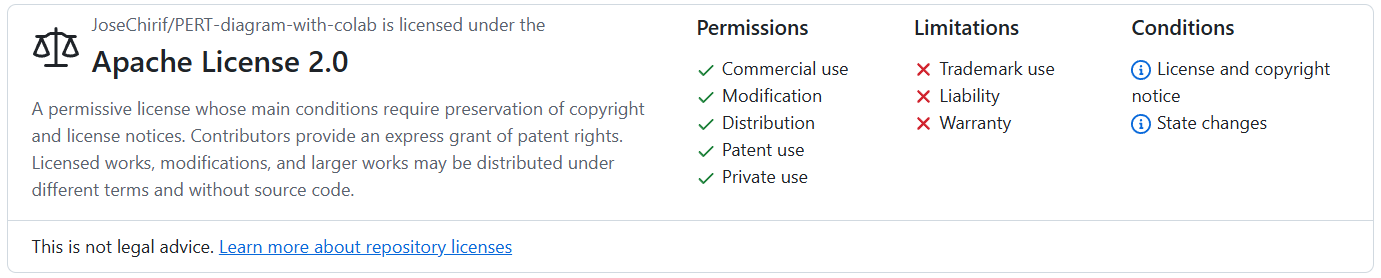](https://github.com/JoseChirif/PERT-diagram-with-colab/blob/main/LICENSE)

# ✍️ Author

[@Jose Chirif](https://github.com/JoseChirif)


## 🚀 About me


I'm an Industrial Engineer specialized in process optimization, business intelligence and data science.
[Porfolio - Network - Contact](https://linktr.ee/jchirif)